# Bird Classification Model

Goal: Create a image classification model with a 85% or higher accuracy. Animal chosen: bird.

Dataset: Bird Species dataset from Kaggle.

URL: https://www.kaggle.com/datasets/umairshahpirzada/birds-20-species-image-classification?resource=download

The dataset contains:

20 bird species
3208 training images, 100 test images(5 images per species)
100 validation images (5 images per species)

### Imports

In [325]:
import os
from pathlib import Path
import random
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import PIL
from PIL import Image
import glob
import zipfile as ZipFile
import pathlib
from glob import iglob
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Conv2D, MaxPooling2D, Dropout, Flatten
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import EarlyStopping, Callback 
from sklearn.metrics import classification_report

In [2]:
data_dir = "/Users/Administrator/Downloads/bird folder"

### Data Exploration

In [3]:
#list of folders in the bird folder
list_dir=os.listdir(data_dir)

In [4]:
list_dir

['images to predict', 'test', 'train', 'valid']

In [5]:
for l in list_dir:
    list_d=[]
    what=os.listdir(data_dir+f'/{l}')
    list_d.append(what)
    print(np.unique(list_d))

['1.jpg' '2.jpg' '3.jpg' '4.jpg' '5.jpg' '6.jpg']
['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'AFRICAN PYGMY GOOSE'
 'ALBATROSS' 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN FLAMINGO' 'AMERICAN GOLDFINCH'
 'AMERICAN KESTREL']
['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'AFRICAN PYGMY GOOSE'
 'ALBATROSS' 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN FLAMINGO' 'AMERICAN GOLDFINCH'
 'AMERICAN KESTREL']
['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFR

As we can see here, other than the valid folder, they all have the same bird species

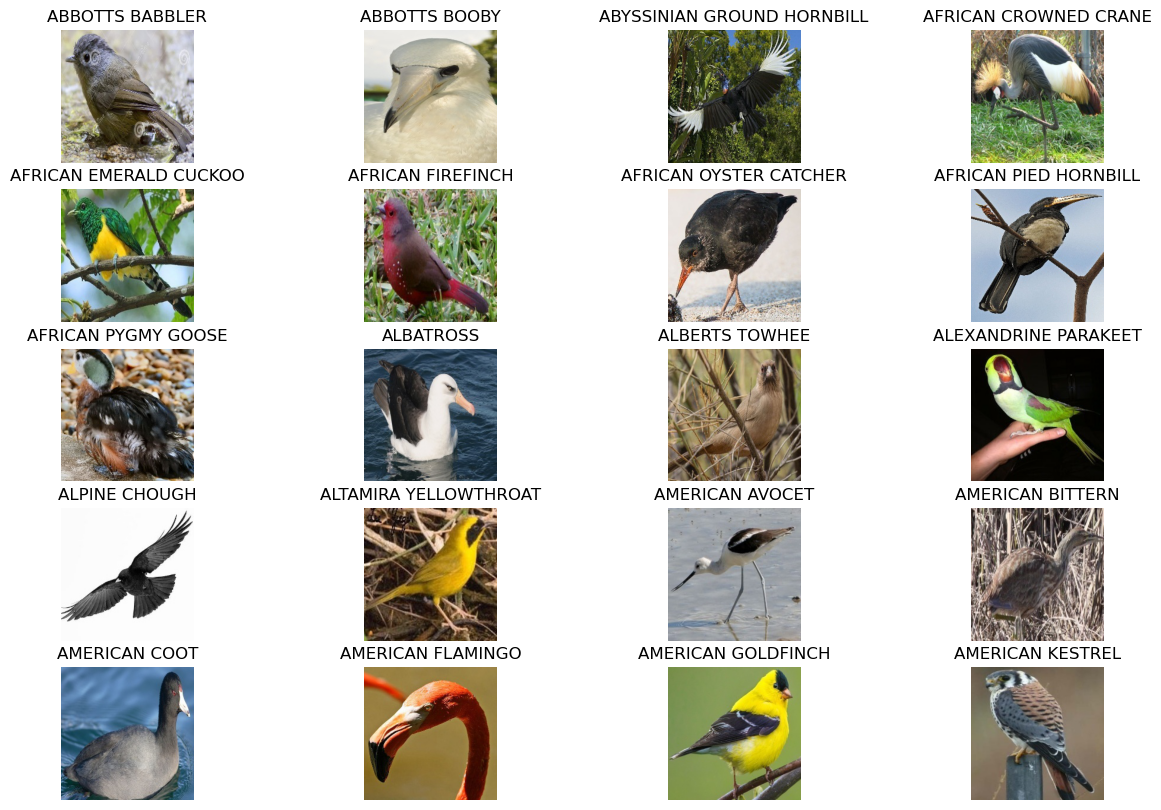

In [331]:
#showing an image of all the birds
train_dir = '/Users/Administrator/Downloads/bird folder/train/'
birds_type = [f.path for f in os.scandir(train_dir) if f.is_dir()]

fig, axes = plt.subplots(5, 4, figsize=(15, 10))
axes = axes.flatten()

for i, b in enumerate((birds_type)):
    image_files = glob.glob(os.path.join(b, '*.jpg'))
    if image_files:
        img_path = (image_files)[0]  # first image in folder
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(os.path.basename(b))
        axes[i].axis('off')
    else:
        axes[i].set_title(os.path.basename(b) + "\n(No image)")
        axes[i].axis('off')

In [332]:
# Getting average image dimensions

w = []
h = []

rootdir_glob = '/Users/Administrator/Downloads/bird folder/**/*' 
file_list = [f for f in iglob(rootdir_glob, recursive=True) if os.path.isfile(f)]

for img in file_list:
    if img[-4:] == '.jpg':
        im = Image.open(img)
        w.append(im.size[0])
        h.append(im.size[1])

In [333]:
# Average width for all images

avg_h = round(sum(w)/len(w))

avg_h

224

In [334]:
# Average height for all images

avg_h = round(sum(h)/len(h))

avg_h

224

as we see here, the average length and height are (224,224)

### ImageDataGenerator

In [335]:
# Image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_gen = ImageDataGenerator(rescale=1./255, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True)

In [348]:
# Train data 

train_dir = '/Users/Administrator/Downloads/bird folder/train' 
train_data = img_gen.flow_from_directory(train_dir,
                                          target_size=(224, 224),batch_size=32,class_mode='categorical',
                                         shuffle=True)

Found 3208 images belonging to 20 classes.


In [337]:
train_data.class_indices

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'AFRICAN PYGMY GOOSE': 8,
 'ALBATROSS': 9,
 'ALBERTS TOWHEE': 10,
 'ALEXANDRINE PARAKEET': 11,
 'ALPINE CHOUGH': 12,
 'ALTAMIRA YELLOWTHROAT': 13,
 'AMERICAN AVOCET': 14,
 'AMERICAN BITTERN': 15,
 'AMERICAN COOT': 16,
 'AMERICAN FLAMINGO': 17,
 'AMERICAN GOLDFINCH': 18,
 'AMERICAN KESTREL': 19}

In [360]:
test_dir = '/Users/Administrator/Downloads/bird folder/test' 
test_data = img_gen.flow_from_directory(test_dir,
                                        target_size=(224, 224),batch_size=1,class_mode='categorical',
                                         shuffle=False)

Found 100 images belonging to 20 classes.


In [339]:
test_data.class_indices

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'AFRICAN PYGMY GOOSE': 8,
 'ALBATROSS': 9,
 'ALBERTS TOWHEE': 10,
 'ALEXANDRINE PARAKEET': 11,
 'ALPINE CHOUGH': 12,
 'ALTAMIRA YELLOWTHROAT': 13,
 'AMERICAN AVOCET': 14,
 'AMERICAN BITTERN': 15,
 'AMERICAN COOT': 16,
 'AMERICAN FLAMINGO': 17,
 'AMERICAN GOLDFINCH': 18,
 'AMERICAN KESTREL': 19}

## Model Creation

### CNN model

In [343]:
# CNM Model

cnn = Sequential()

# Convolutional layer 1

cnn.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(224, 224, 3)))

cnn.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 2

cnn.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(224, 224, 3)))

cnn.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3

cnn.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(224, 224, 3)))

cnn.add(Dropout(rate= 0.2))

cnn.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4

cnn.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(224, 224, 3)))

cnn.add(Dropout(rate= 0.2))

cnn.add(MaxPooling2D(pool_size=(2,2)))

# Flatten

cnn.add(Flatten())

# Fully connected layer

cnn.add(Dense(256, activation='relu'))

cnn.add(Dropout(rate= 0.2))

# Output layer

cnn.add(Dense(units=20, activation='softmax'))

# Compile model

cnn.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [344]:
cnn.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_85 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_86 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 dropout_89 (Dropout)        (None, 52, 52, 128)     

In [349]:
early_stop = EarlyStopping(monitor='val_loss', patience =2)

cnn.fit(train_data, epochs=15, validation_data=test_data, callbacks=[early_stop])

Epoch 1/15
101/101 [==============================] - 227s 2s/step - loss: 1.0210 - accuracy: 0.6780 - val_loss: 0.7555 - val_accuracy: 0.7900
Epoch 2/15
101/101 [==============================] - 229s 2s/step - loss: 0.9769 - accuracy: 0.6920 - val_loss: 0.7474 - val_accuracy: 0.8000
Epoch 3/15
101/101 [==============================] - 228s 2s/step - loss: 0.9405 - accuracy: 0.7036 - val_loss: 0.7807 - val_accuracy: 0.7800
Epoch 4/15
101/101 [==============================] - 225s 2s/step - loss: 0.9301 - accuracy: 0.7042 - val_loss: 0.7635 - val_accuracy: 0.7900


In [351]:
metrics_cnn = pd.DataFrame(cnn.history.history)
metrics_cnn

,loss,accuracy,val_loss,val_accuracy
0,1.020955,0.677993,0.755457,0.79
1,0.976888,0.692020,0.747400,0.80
2,0.940520,0.703554,0.780691,0.78
3,0.930129,0.704177,0.763532,0.79


<Axes: >

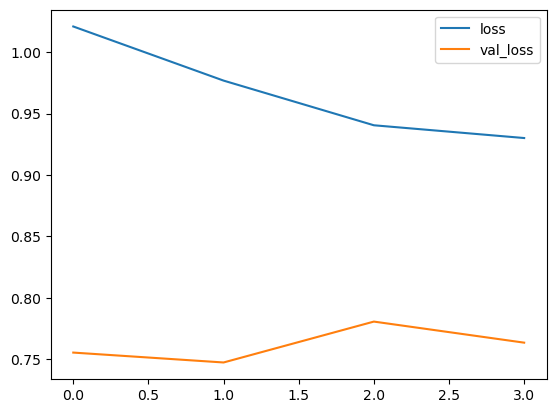

In [432]:
#Validation loss vs. loss plot
metrics_cnn[['loss','val_loss']].plot()

<Axes: >

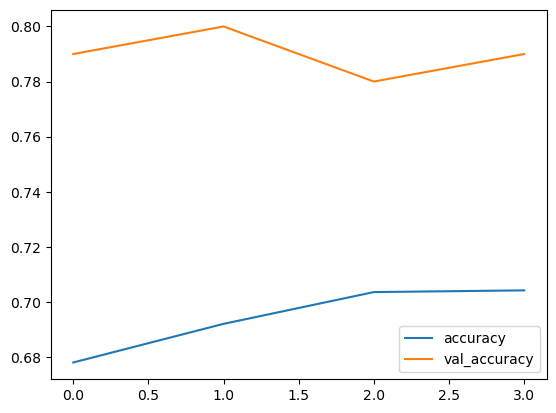

In [433]:
# Accuracy vs. validation accuracy plot

metrics_cnn[['accuracy','val_accuracy']].plot()

In [361]:
# Classification report

cnn_pred = cnn.predict(test_data)

y_true = []

for i in range(len(test_data)):
    y_true.extend(np.argmax(test_data[i][1], axis=1))

y_true = np.array(y_true)

cnn_classes=np.argmax(cnn_pred, axis=1)

print(classification_report(y_true, cnn_classes,
                            target_names=test_data.class_indices.keys()))

100/100 [==============================] - 2s 22ms/step
                            precision    recall  f1-score   support

           ABBOTTS BABBLER       0.33      0.40      0.36         5
             ABBOTTS BOOBY       0.44      0.80      0.57         5
ABYSSINIAN GROUND HORNBILL       0.50      0.80      0.62         5
     AFRICAN CROWNED CRANE       0.75      0.60      0.67         5
    AFRICAN EMERALD CUCKOO       1.00      0.80      0.89         5
         AFRICAN FIREFINCH       0.71      1.00      0.83         5
    AFRICAN OYSTER CATCHER       1.00      1.00      1.00         5
     AFRICAN PIED HORNBILL       1.00      0.60      0.75         5
       AFRICAN PYGMY GOOSE       0.62      1.00      0.77         5
                 ALBATROSS       1.00      0.80      0.89         5
            ALBERTS TOWHEE       0.75      0.60      0.67         5
      ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
             ALPINE CHOUGH       0.75      0.60      0.67  

After multiple attempts with cnn modelling, the model hasnt been able to reach to a accuracy and a val_accuracy of 85% or more, even after adjusting the layers, and the filter amount. As we see for one of the attempts, it was only able to read a F1 score accuracy of 77%

### VGG16

Trying out pretrained models to be able to predict the images.

In [354]:
#new imports for this model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow.keras as keras
from tensorflow.keras import models, layers

In [170]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [171]:
base_model.trainable = False

In [172]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [382]:
#As we can see above, the base model is missing a flatten layer, dense layer and output, so we will be adding that to our model
vgg16_model=Sequential()
vgg16_model.add(base_model)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(256, activation='relu'))
vgg16_model.add(Dense(units=20, activation='softmax'))

In [383]:
vgg16_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [384]:
vgg16_model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_35 (Flatten)        (None, 25088)             0         
                                                                 
 dense_72 (Dense)            (None, 256)               6422784   
                                                                 
 dense_73 (Dense)            (None, 20)                5140      
                                                                 
Total params: 21,142,612
Trainable params: 6,427,924
Non-trainable params: 14,714,688
_________________________________________________________________


In [385]:
early_stop = EarlyStopping(monitor='val_loss', patience =2)

vgg16_model.fit(train_data, epochs=10, validation_data=test_data, callbacks=[early_stop])

Epoch 1/10
101/101 [==============================] - 687s 7s/step - loss: 2.4329 - accuracy: 0.3900 - val_loss: 1.3322 - val_accuracy: 0.6700
Epoch 2/10
101/101 [==============================] - 677s 7s/step - loss: 1.1991 - accuracy: 0.6493 - val_loss: 0.9381 - val_accuracy: 0.6900
Epoch 3/10
101/101 [==============================] - 681s 7s/step - loss: 0.8356 - accuracy: 0.7441 - val_loss: 0.6731 - val_accuracy: 0.8100
Epoch 4/10
101/101 [==============================] - 674s 7s/step - loss: 0.7207 - accuracy: 0.7700 - val_loss: 0.5506 - val_accuracy: 0.8200
Epoch 5/10
101/101 [==============================] - 676s 7s/step - loss: 0.5906 - accuracy: 0.8155 - val_loss: 0.4825 - val_accuracy: 0.8600
Epoch 6/10
101/101 [==============================] - 673s 7s/step - loss: 0.5212 - accuracy: 0.8357 - val_loss: 0.5325 - val_accuracy: 0.8200
Epoch 7/10
101/101 [==============================] - 673s 7s/step - loss: 0.4729 - accuracy: 0.8473 - val_loss: 0.3793 - val_accuracy: 0.8700

In [389]:
metrics_vgg16 = pd.DataFrame(vgg16_model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,2.432939,0.389963,1.332197,0.67
1,1.199135,0.649314,0.938084,0.69
2,0.835603,0.744077,0.673069,0.81
3,0.720684,0.769950,0.550648,0.82
4,0.590563,0.815461,0.482509,0.86
5,0.521212,0.835723,0.532479,0.82
6,0.472876,0.847257,0.379272,0.87
7,0.439839,0.864713,0.357641,0.88
8,0.415650,0.871259,0.390545,0.90
9,0.401017,0.866584,0.482473,0.85


<Axes: >

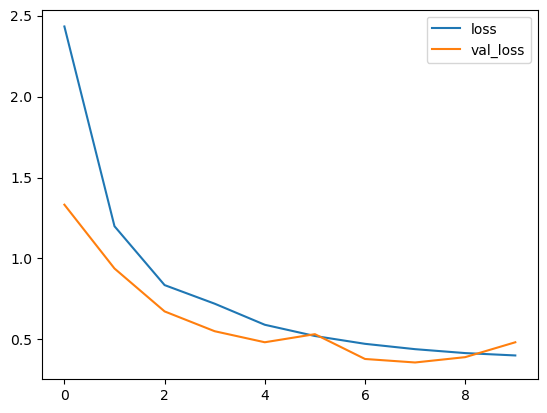

In [390]:
#loss plot
metrics_vgg16[['loss','val_loss']].plot()

<Axes: >

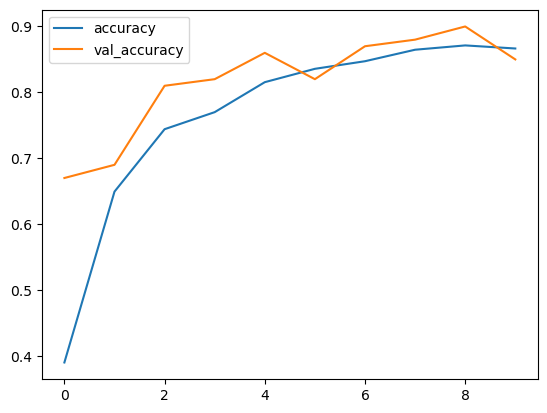

In [391]:
# accuracy plot
metrics_vgg16[['accuracy','val_accuracy']].plot()

In [416]:
# Classification report

vgg16_pred = vgg16_model.predict(test_data)

vgg_classes=np.argmax(vgg16_pred, axis=1)

print(classification_report(y_true, vgg_classes,
                            target_names=test_data.class_indices.keys())) 
#y_true was already created found above

100/100 [==============================] - 25s 248ms/step
                            precision    recall  f1-score   support

           ABBOTTS BABBLER       1.00      0.80      0.89         5
             ABBOTTS BOOBY       1.00      0.60      0.75         5
ABYSSINIAN GROUND HORNBILL       1.00      1.00      1.00         5
     AFRICAN CROWNED CRANE       0.83      1.00      0.91         5
    AFRICAN EMERALD CUCKOO       0.80      0.80      0.80         5
         AFRICAN FIREFINCH       0.80      0.80      0.80         5
    AFRICAN OYSTER CATCHER       0.83      1.00      0.91         5
     AFRICAN PIED HORNBILL       1.00      0.80      0.89         5
       AFRICAN PYGMY GOOSE       1.00      1.00      1.00         5
                 ALBATROSS       0.62      1.00      0.77         5
            ALBERTS TOWHEE       1.00      1.00      1.00         5
      ALEXANDRINE PARAKEET       0.57      0.80      0.67         5
             ALPINE CHOUGH       1.00      0.80      0.89

After changing the Dense layer(128, 256, 512), this model shows a accuracy of 88%, with a sense layer of 256.

### Inception V3 model

We also tried Inception V3 model because it has performed well on classifying images of birds before. We used the base model by freezing all of the layers and preventing training, only altering the output layer to fit our image classification needs.

In [394]:
# base model instance
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(include_top= False, input_shape = (224, 224, 3))

base_model.trainable = False

87910968/87910968 [==============================] - 12s 0us/step


In [395]:
# Hidden layers

x = base_model.get_layer('mixed10').output

x = layers.GlobalAveragePooling2D()(x)

In [396]:
# Output layer

outputs = layers.Dense(20, activation = 'softmax')(x)

In [401]:
# Model

inc_model = models.Model(base_model.input, outputs)

In [402]:
# Compile model

inc_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [403]:
# Summary

inc_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_91 (Conv2D)             (None, 111, 111, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_91[0][0]']              
 alization)                     )                                                           

In [405]:
# Fitting inception v3 model

early_stop = EarlyStopping(monitor='val_loss', patience=1)

inc_model.fit(train_data, epochs= 10, validation_data = test_data, callbacks=[early_stop])

Epoch 1/10
101/101 [==============================] - 158s 1s/step - loss: 0.5109 - accuracy: 0.8469 - val_loss: 0.1819 - val_accuracy: 0.9500
Epoch 2/10
101/101 [==============================] - 147s 1s/step - loss: 0.2739 - accuracy: 0.9186 - val_loss: 0.1067 - val_accuracy: 0.9700
Epoch 3/10
101/101 [==============================] - 144s 1s/step - loss: 0.2167 - accuracy: 0.9367 - val_loss: 0.0986 - val_accuracy: 0.9800
Epoch 4/10
101/101 [==============================] - 145s 1s/step - loss: 0.1804 - accuracy: 0.9417 - val_loss: 0.1078 - val_accuracy: 0.9500


In [411]:
#Metric inception V3
metrics_inc = pd.DataFrame(inc_model.history.history)
metrics_inc

,loss,accuracy,val_loss,val_accuracy
0,0.510895,0.846945,0.181872,0.95
1,0.273918,0.918641,0.106659,0.97
2,0.216683,0.936721,0.098626,0.98
3,0.180427,0.941708,0.107779,0.95


<Axes: >

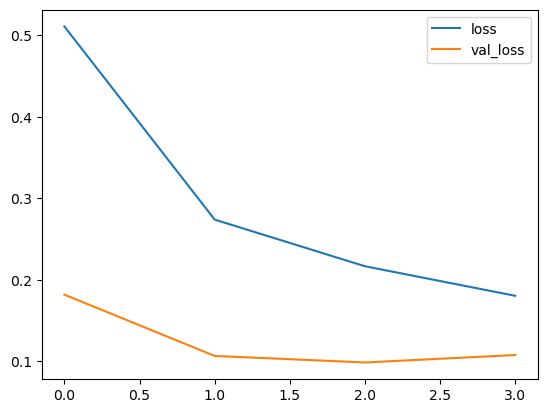

In [412]:
#Validation loss vs. loss plot
metrics_inc[['loss','val_loss']].plot()

<Axes: >

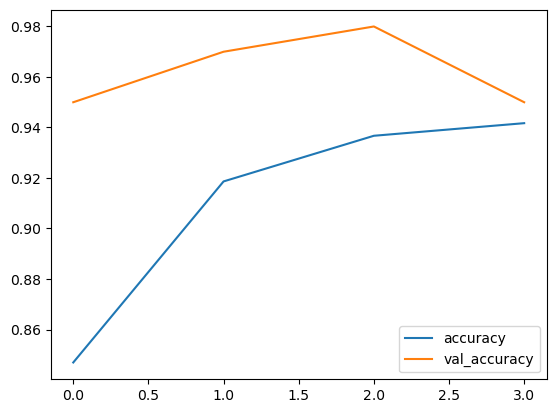

In [413]:
# Accuracy vs. validation accuracy plot

metrics_inc[['accuracy','val_accuracy']].plot()

In [415]:
# Classification report

inc_pred = inc_model.predict(test_data)

inc_classes=np.argmax(inc_pred, axis=1)

print(classification_report(y_true, inc_classes,
                            target_names=test_data.class_indices.keys()))

100/100 [==============================] - 10s 95ms/step
                            precision    recall  f1-score   support

           ABBOTTS BABBLER       0.83      1.00      0.91         5
             ABBOTTS BOOBY       1.00      0.80      0.89         5
ABYSSINIAN GROUND HORNBILL       0.83      1.00      0.91         5
     AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
    AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
         AFRICAN FIREFINCH       1.00      0.80      0.89         5
    AFRICAN OYSTER CATCHER       1.00      1.00      1.00         5
     AFRICAN PIED HORNBILL       1.00      0.80      0.89         5
       AFRICAN PYGMY GOOSE       1.00      1.00      1.00         5
                 ALBATROSS       0.83      1.00      0.91         5
            ALBERTS TOWHEE       1.00      0.80      0.89         5
      ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
             ALPINE CHOUGH       1.00      1.00      1.00 

## Final Model

As seen, with the Inception V3 model, we got a 95% accuracy, compared to CNN, which we found was 77% amd Vgg16 which is 88%.
Interestingly, the validation accuracy is also higher than the training accuracy and the validation loss is also lower than the training loss. We chose the inception v3 as our final model

In [418]:
# we will save all models but will only use V3 model

!mkdir -p saved_model

vgg16_model.save('saved_model/vgg16_model')
cnn.save('saved_model/cnn_model')
inc_model.save('saved_model/inc_model')


A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model/vgg16_model\assets


INFO:tensorflow:Assets written to: saved_model/vgg16_model\assets


INFO:tensorflow:Assets written to: saved_model/cnn_model\assets


INFO:tensorflow:Assets written to: saved_model/cnn_model\assets


INFO:tensorflow:Assets written to: saved_model/inc_model\assets


INFO:tensorflow:Assets written to: saved_model/inc_model\assets


In [419]:
new_model = tf.keras.models.load_model('saved_model/inc_model')

In [430]:
#new images

dir_predict='/Users/Administrator/Downloads/bird folder/images to predict'

paths=glob.glob(os.path.join(dir_predict, '*.jpg'))

images_array = []
for path in paths:
    img = Image.open(path).resize((224, 224))
    img_array = np.array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    images_array.append(img_array)

In [431]:
for im in images_array:
    y_pred=new_model.predict(im)
    y_pred=np.argmax(y_pred, axis=1)
    print(y_pred)

1/1 [==============================] - 0s 130ms/step
[3]
1/1 [==============================] - 0s 118ms/step
[3]
1/1 [==============================] - 0s 113ms/step
[3]
1/1 [==============================] - 0s 115ms/step
[3]
1/1 [==============================] - 0s 107ms/step
[3]
1/1 [==============================] - 0s 111ms/step
[7]


In [429]:
test_data.class_indices

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'AFRICAN PYGMY GOOSE': 8,
 'ALBATROSS': 9,
 'ALBERTS TOWHEE': 10,
 'ALEXANDRINE PARAKEET': 11,
 'ALPINE CHOUGH': 12,
 'ALTAMIRA YELLOWTHROAT': 13,
 'AMERICAN AVOCET': 14,
 'AMERICAN BITTERN': 15,
 'AMERICAN COOT': 16,
 'AMERICAN FLAMINGO': 17,
 'AMERICAN GOLDFINCH': 18,
 'AMERICAN KESTREL': 19}

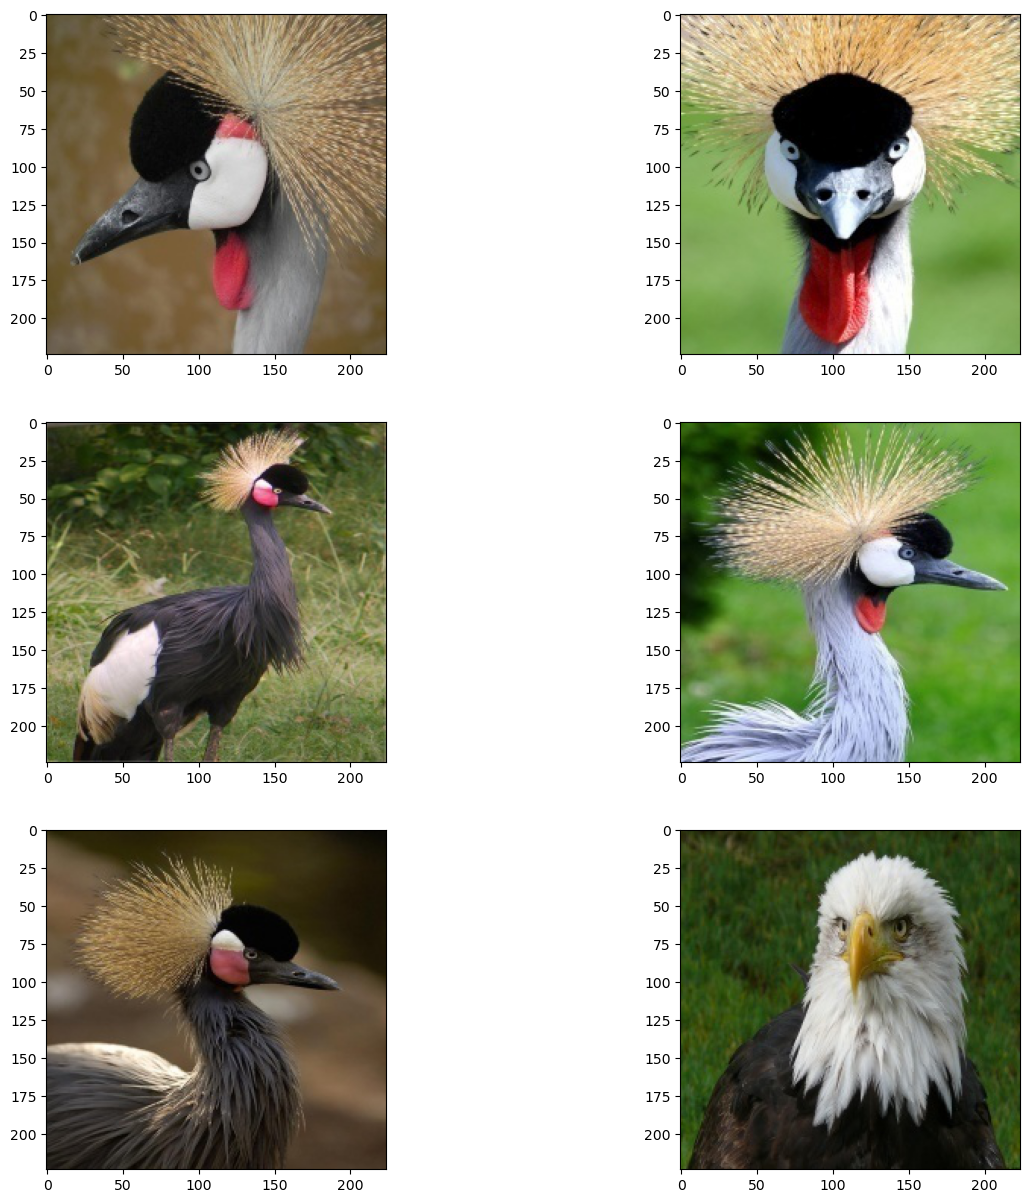

In [300]:
# plot the images 
fig, axes = plt.subplots(3, 2, figsize=(15, 5 * 3))
axes = axes.flatten()  # flatten for easy iteration

for i, img_file in enumerate(paths):
    img_path = os.path.join(dir_predict,img_file)
    img = Image.open(img_path)
    axes[i].imshow(img)
    

Results: as we can see, they predicted all of the images from 1-5 are 'AFRICAN CROWNED CRANE', which is right. They did however predict the last one wrong, which also said 'AFRICAN CROWNED CRANE', which is not.